In [224]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [225]:
data=pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [226]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [228]:
data=data[['Survived', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [229]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [230]:
data.loc[data["Sex"]=="male", "gender"]=0
data.loc[data["Sex"]=="female", "gender"]=1

C:\Users\99290\AppData\Local\Temp\ipykernel_20272\1783662593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data["Sex"]=="male", "gender"]=0


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   gender    891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 48.9+ KB


In [232]:
data=data[['Survived', 'gender', 'Age', 'SibSp',
       'Parch', 'Fare']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   gender    891 non-null    float64
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [233]:
data["Age"].fillna(data.Age.mean(), inplace=True)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   gender    891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [235]:
X=data.drop(["Survived"], axis=1)
y=data.Survived  #y=data["Survived"]

In [236]:
##Split Data In Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [237]:
X_test

,gender,Age,SibSp,Parch,Fare
495,0.0,29.699118,0,0,14.4583
648,0.0,29.699118,0,0,7.5500
278,0.0,7.000000,4,1,29.1250
31,1.0,29.699118,1,0,146.5208
255,1.0,29.000000,0,2,15.2458
...,...,...,...,...,...
263,0.0,40.000000,0,0,0.0000
718,0.0,29.699118,0,0,15.5000
620,0.0,27.000000,1,0,14.4542
786,1.0,18.000000,0,0,7.4958


In [238]:
logreg=LogisticRegression()

In [239]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [240]:
y_pred=logreg.predict(X_test)

In [241]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [242]:
LogRegAccuracy=metrics.accuracy_score(y_test, y_pred)

In [243]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[142,  26],
       [ 32,  68]], dtype=int64)

In [244]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Survived,,
0,142,26
1,32,68


In [245]:
metrics.roc_auc_score(y_test, y_pred)

0.7626190476190478

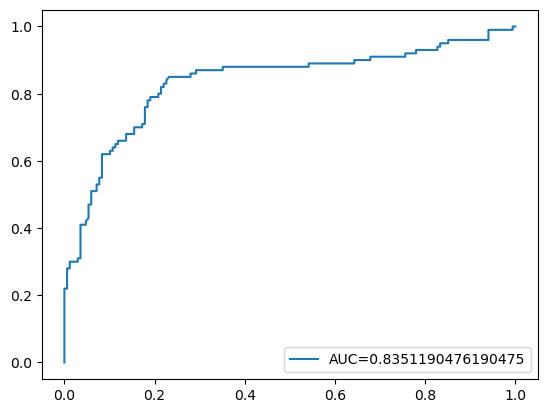

In [246]:
#plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [247]:
y_pred_proba


array([0.20550598, 0.19085407, 0.06767413, 0.92739516, 0.6969517 ,
       0.24268025, 0.94533217, 0.94189284, 0.33953751, 0.75571745,
       0.14196522, 0.72607517, 0.19126679, 0.81372178, 0.90647066,
       0.81617572, 0.21900235, 0.18762737, 0.17408134, 0.27231293,
       0.24440126, 0.96192645, 0.19124098, 0.24390931, 0.79204014,
       0.87496768, 0.18368414, 0.78741183, 0.78176528, 0.57036966,
       0.18185505, 0.67185574, 0.20097165, 0.25515962, 0.13269871,
       0.23329981, 0.14701587, 0.20312431, 0.2199339 , 0.1295769 ,
       0.13937297, 0.20699094, 0.20559691, 0.06664982, 0.83010599,
       0.1915681 , 0.1915681 , 0.9705787 , 0.1706804 , 0.16319631,
       0.24145539, 0.31900749, 0.78009978, 0.2315988 , 0.2407225 ,
       0.21091609, 0.12819645, 0.42171309, 0.07765814, 0.10731309,
       0.21829079, 0.62043178, 0.74831794, 0.26570245, 0.69484724,
       0.18339242, 0.72012558, 0.21821538, 0.79433717, 0.8420986 ,
       0.74388928, 0.15391091, 0.29906587, 0.19188716, 0.21066

In [248]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

### DecisionTreeClassifier

In [249]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
model_tree=DecisionTreeClassifier(max_depth=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [251]:
y_predict=model_tree.predict(X_test)

In [252]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.7873134328358209


In [253]:
#using for find the best max_depth

In [254]:
#1st bosting algorithm
#RandomForest

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
forest=RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict=forest.predict(X_test)
forestacc=accuracy_score(y_test, y_predict)
print("Forest Accuracy: %.3f" % forestacc)

Forest Accuracy: 0.825


In [257]:
forest1=RandomForestClassifier(criterion='gini', 
                             n_estimators=10,
                             random_state=1,
                             n_jobs=2)
#find optimum number of estimators

In [258]:
оптимум=forestacc
#цикл
forest1=RandomForestClassifier(criterion='gini', 
                             n_estimators=i,
                             random_state=1,
                             n_jobs=2)
обучение
ii[i]=i
acc[i]=точность
если точность>оптимум
оптимум=точность
оптимумi=i
print оптимумумов


SyntaxError: invalid syntax (3960465100.py, line 10)

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Задаем начальные значения оптимумов
оптимум_acc = 0
оптимум_auc = 0

# Задаем параметры для цикла
макс_количество_деревьев = 100  # замените на ваше максимальное значение
ii = [0] * (макс_количество_деревьев + 1)
acc = [0] * (макс_количество_деревьев + 1)
auc = [0] * (макс_количество_деревьев + 1)

# Цикл по количеству деревьев
for i in range(1, макс_количество_деревьев + 1):
    # Создаем модель RandomForestClassifier
    forest1 = RandomForestClassifier(criterion='gini', n_estimators=i, random_state=1, n_jobs=2)

    # Разбиваем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Обучаем модель
    forest1.fit(X_train, y_train)

    # Предсказываем метки на тестовой выборке
    y_pred = forest1.predict(X_test)

    # Вычисляем точность
    точность = accuracy_score(y_test, y_pred)

    # Вычисляем AUC
    вероятности = forest1.predict_proba(X_test)[:, 1]  # вероятности класса 1
    auc_score = roc_auc_score(y_test, вероятности)

    # Сохраняем значения для ii, acc и auc
    ii[i] = i
    acc[i] = точность
    auc[i] = auc_score

    # Проверяем, является ли текущая точность лучше текущего оптимума
    if точность > оптимум_acc:
        оптимум_acc = точность
        оптимум_acc_i = i

    # Проверяем, является ли текущий AUC лучше текущего оптимума
    if auc_score > оптимум_auc:
        оптимум_auc = auc_score
        оптимум_auc_i = i

# Выводим результаты
print(f"Оптимальное количество деревьев для accuracy: {оптимум_acc_i}")
print(f"Оптимальная точность: {оптимум_acc}")
print(f"Оптимальное количество деревьев для AUC: {оптимум_auc_i}")
print(f"Оптимальное AUC: {оптимум_auc}")

Оптимальное количество деревьев для accuracy: 24
Оптимальная точность: 0.8100558659217877
Оптимальное количество деревьев для AUC: 54
Оптимальное AUC: 0.8787644787644788


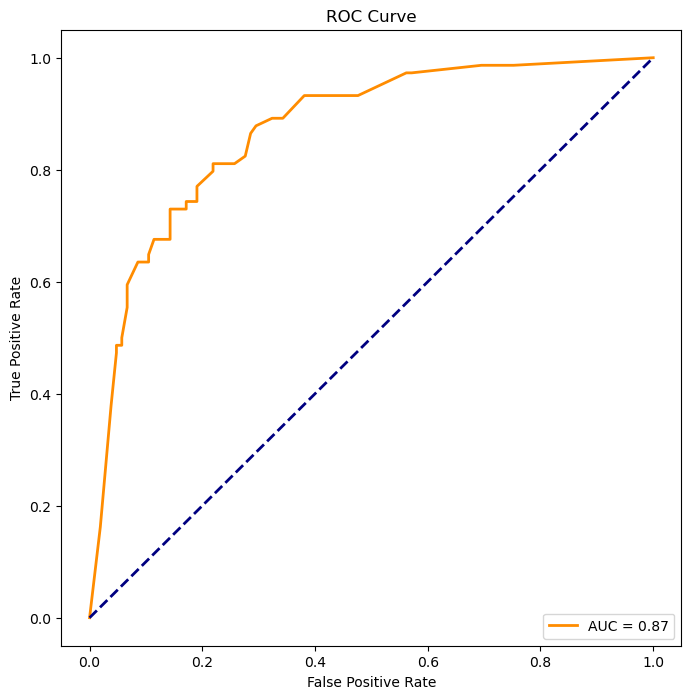

In [260]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestClassifier(criterion='gini', n_estimators=21, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

y_pred_proba = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [261]:
data.corr()

,Survived,gender,Age,SibSp,Parch,Fare
Survived,1.000000,0.543351,-0.069809,-0.035322,0.081629,0.257307
gender,0.543351,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,-0.069809,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,0.182333,0.091566,0.159651,0.216225,1.000000


<Axes: >

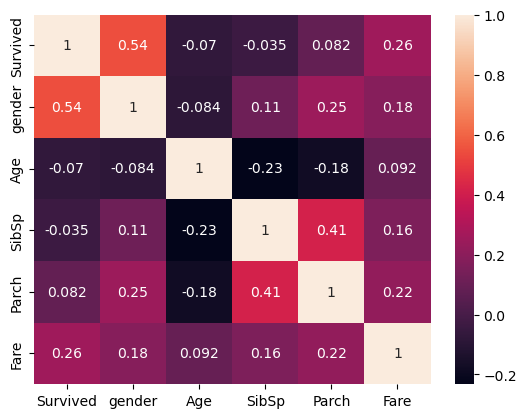

In [262]:
import seaborn as sns  
sns.heatmap(data.corr(), annot=True)

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [264]:
y=data.Survived

In [265]:
X=data.drop(["Survived"], axis=1)

In [266]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [267]:
X

,gender,Age,SibSp,Parch,Fare
0,0.0,22.000000,1,0,7.2500
1,1.0,38.000000,1,0,71.2833
2,1.0,26.000000,0,0,7.9250
3,1.0,35.000000,1,0,53.1000
4,0.0,35.000000,0,0,8.0500
...,...,...,...,...,...
886,0.0,27.000000,0,0,13.0000
887,1.0,19.000000,0,0,30.0000
888,1.0,29.699118,1,2,23.4500
889,0.0,26.000000,0,0,30.0000


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [269]:
X_test

,gender,Age,SibSp,Parch,Fare
218,1.0,32.000000,0,0,76.2917
359,1.0,29.699118,0,0,7.8792
220,0.0,16.000000,0,0,8.0500
165,0.0,9.000000,0,2,20.5250
334,1.0,29.699118,1,0,133.6500
...,...,...,...,...,...
188,0.0,40.000000,1,1,15.5000
154,0.0,29.699118,0,0,7.3125
434,0.0,50.000000,1,0,55.9000
544,0.0,50.000000,1,0,106.4250


In [270]:
# Gradient Boosting Regression Model   
gbr = GradientBoostingRegressor()     # Creating an object of Gradient Boosting Regressor class 
gbr.fit(X_train, y_train) 
#calculating the metrics for the model  
y_pred = gbr.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  
print("Mean Squared Error:", mse)  
print("R-Squared:", r2)

Mean Squared Error: 0.12600565318004744
R-Squared: 0.47348107282969476


In [271]:
X_test.head()

,gender,Age,SibSp,Parch,Fare
218,1.0,32.000000,0,0,76.2917
359,1.0,29.699118,0,0,7.8792
220,0.0,16.000000,0,0,8.0500
165,0.0,9.000000,0,2,20.5250
334,1.0,29.699118,1,0,133.6500


In [272]:
print("Survived:", gbr.predict([[0, 38, 1, 0, 7.7750]]))

Survived: [0.08761881]


C:\Users\99290\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [273]:
import pickle

In [274]:
pickle_out=open("LOGISTICREGRESSION.pkl", "wb")

In [275]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform (X_train) 
X_test = sc.transform (X_test)

In [276]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
  # Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7932960893854749


In [277]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier()

In [278]:
y_pred = knn.predict (X_test)

In [279]:
from sklearn.metrics import confusion_matrix, precision_score 
cm = confusion_matrix (y_test, y_pred) 
print(cm)

[[95 13]
 [24 47]]


In [280]:
knn.predict([[1, 10, 0, 0, 8.3200]])

array([1], dtype=int64)

In [281]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

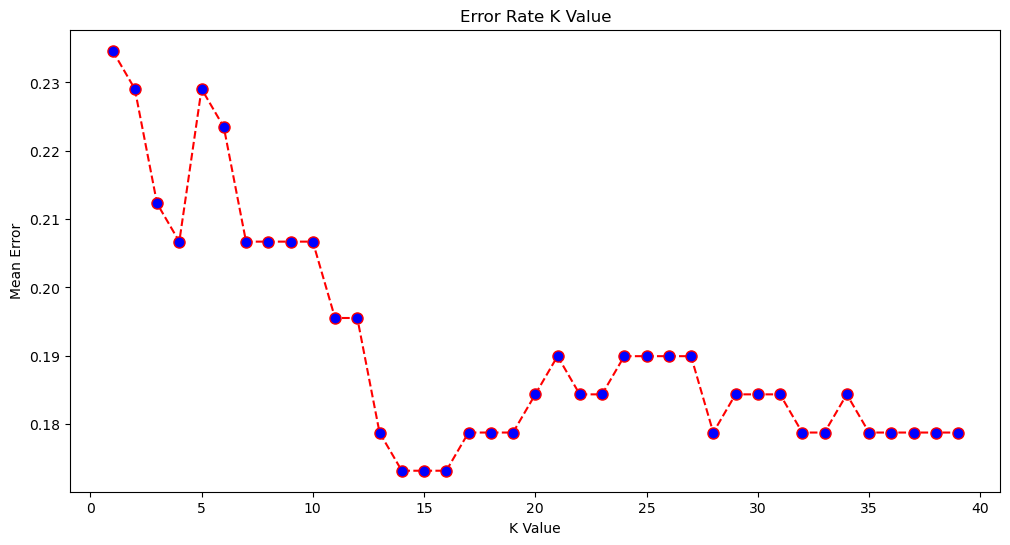

In [282]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [283]:
from sklearn.metrics import classification_report

In [284]:
print(knn.score(X_test, y_test))

0.8212290502793296


In [285]:
confusion_matrix(y_test, y_pred)

array([[95, 13],
       [24, 47]], dtype=int64)

In [286]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Survived,,
0,95,13
1,24,47


In [287]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       108
           1       0.78      0.66      0.72        71

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [288]:
import pickle
pickle_out = open("LOGISTICREGRESSION.pkl","wb")
pickle.dump(gbr, pickle_out)
pickle_out.close()